In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Questão 18

## 1) Entrar os coeficientes

$max z = 2x1 + x2$

sujeito a

$6x1 + 3x2 <= 480$

$6x1 + 3x2 >= 450$

$2x1 + 4x2 <= 480$

$2x1 + 4x2 >= 450$

consideração: entrar com as restrições em formado de >= 

In [6]:
A = [[-6, -3],[6, 3], [-2, -4], [2, 4]]
B = [-480, 450, -480, 450]
C = [-2, -1]
prob = 'min'
ineq = []
non_negative = True

## 2) printar a função objetiva e as restrições

In [7]:
def f_a(A, B, C, prob, ineq, non_negative=True) -> None:
    ineq = []

    if not ineq:
        if prob == 'max':
            ineq = ['<='] * len(B)
        elif prob == 'min':
            ineq = ['>='] * len(B)

    print(f"Otimização de:  {prob} Z = {C[0]}x + {C[1]}y")

    print("\nSujeito a:")
    for i in range(len(A)):
        print(f"        {A[i][0]}x + {A[i][1]}y {ineq[i]} {B[i]}")
    
    if non_negative:
        print("\n Tal que: x, y >= 0")

    return None

In [8]:
f_a(A, B, C, prob, ineq, non_negative)

Otimização de:  min Z = -2x + -1y

Sujeito a:
        -6x + -3y >= -480
        6x + 3y >= 450
        -2x + -4y >= -480
        2x + 4y >= 450

 Tal que: x, y >= 0


## 3) printar a função objetiva e as restrições

### Melhorar essa etapa do codigo, pois ainda nao usa os coeficientes, essa etapa é hard code

Text(0, 0.5, '$y$')

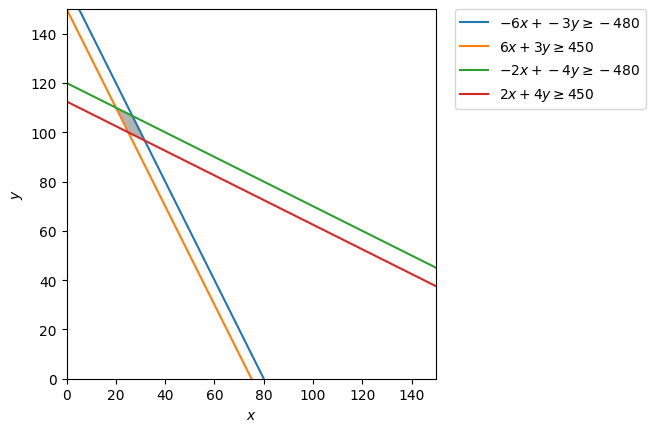

In [20]:
d = np.linspace(-2,150,300)

x,y = np.meshgrid(d,d)

# plt.imshow( (-3*y >= (-480 + 6*x)) & # -6x + -3y >= -480
#              (3*y >= (450 - 6*x)) & # 6x + 3y >= 450
#              (-4*y <= (-480 + 2*x)) & # -2x + -4y >= -480
#              (4*y <= (450 - 2*x)) # 2x + 4y >= 450
#              ).astype(int) , 
#                 extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);

plt.imshow( ((-3*y >= (-480 + 6*x)) & # -6x + -3y >= -480
             (3*y >= (450 - 6*x)) & # 6x + 3y >= 450
             (-4*y >= (-480 + 2*x)) & # -2x + -4y >= -480
             (4*y >= (450 - 2*x)) # 2x + 4y >= 450
             ).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);


# plot the lines defining the constraints
#Dado que x = x1 
#         y = x2

x = np.linspace(0, 150, 2000)
y1 = -((-480 + 6*x)/3.0)
y2 = (450 - 6*x)/3.00
y3 = -((-480 + 2*x)/4.00)
y4 = ((450 - 2*x)/4.00)

# Make plot
#plt.plot(3, 0)
plt.plot(x, y1, label=r'$-6x + -3y \geq -480$')
plt.plot(x, y2, label=r'$6x + 3y \geq 450$')
plt.plot(x, y3, label=r'$-2x + -4y \geq -480$')
plt.plot(x, y4, label=r'$2x + 4y \geq 450$')
plt.xlim(0,150)
plt.ylim(0,150)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

## 4) Calcular as interseções

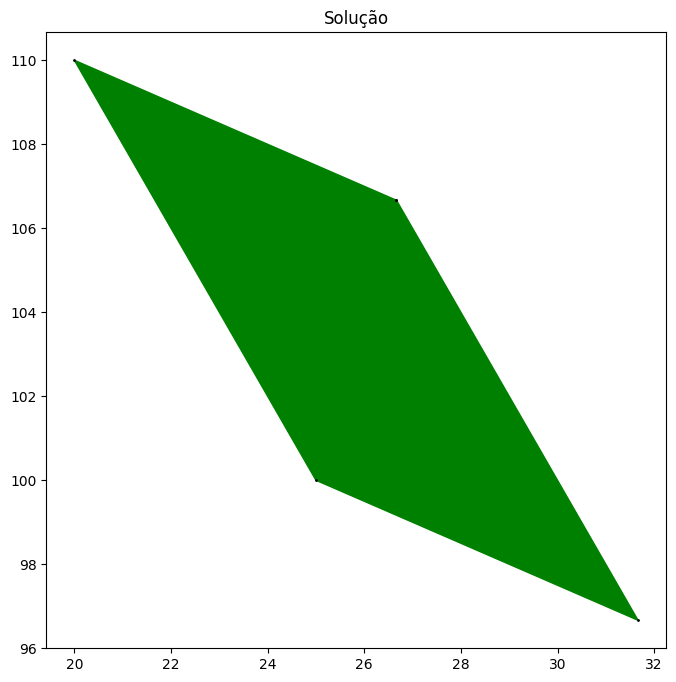

In [21]:
from intvalpy import lineqs
import numpy as np

A = np.array(A)
b = np.array(B)

dots = lineqs(A, b, title='Solução', s=1.0, bounds=[[0, 0], [100, 100]], color='Green', alpha=1.0, size=(8,8), save=True)

In [22]:
print(dots)

[[ 26.66666667 106.66666667]
 [ 31.66666667  96.66666667]
 [ 25.         100.        ]
 [ 20.         110.        ]]


## 5) Calcular os calores da função objetica

In [23]:
print(f"Dado: Z = {C[0]}x + {C[1]}y \n")

z_solutions = {}
x_list = []
for dot in dots:
    solution = round(C[0]*dot[0] + C[1]*dot[1], 4)
    ponto = f"{dot[0]},{dot[1]}"
    z_solutions.update({solution: ponto})
    
    print(f"Z({ponto}) = {solution}")

Dado: Z = -2x + -1y 

Z(26.666666666667,106.666666666667) = -160.0
Z(31.666666666667,96.666666666667) = -160.0
Z(25.0,100.0) = -150.0
Z(20.0,110.0) = -150.0


In [24]:
z_solutions

{-160.0: '31.666666666667,96.666666666667', -150.0: '20.0,110.0'}

 ## 6) Retornar o valor de menor ou maior dependendo da otimizacao

In [25]:
max(z_solutions. values()) 

'31.666666666667,96.666666666667'

In [26]:
z_solutions[min(z_solutions)]

'31.666666666667,96.666666666667'

In [27]:
if prob == 'max':
    print(f"O valor maximo da zona factivel é {max(z_solutions)} encontrado no ponto Z({z_solutions[max(z_solutions)]})")
elif prob == 'min':
    if min(z_solutions) < 0:
        result = min(z_solutions) * -1
    else:
        result = min(z_solutions)
    print(f"O valor minimo da zona factivel é {result} encontrado no ponto Z({z_solutions[min(z_solutions)]})")

O valor minimo da zona factivel é 160.0 encontrado no ponto Z(31.666666666667,96.666666666667)
